Question 1: Coverage Analysis
1.) Length of Reference Genome: 233806 bp
        (Command: samtools faidx /Users/cmdb/Downloads/asm/ref.fa)
        
2.) There are four reads:
    a. frag180.1 = 100 bp
    b. frag180.2 = 100 bp
    c. jumpk1.1 = 50 bp
    d. jumpk1.2 = 50 bp
        (Command:   fastQC /Users/cmdb/Downloads/asm/frag180.1.fq
                    fastqc /Users/cmdb/Downloads/asm/frag180.2.fq
                    fastqc /Users/cmdb/Downloads/asm/jump2k.1.fq
                    fastqc /Users/cmdb/Downloads/asm/jump2k.2.fq)
        
3.) We expect to have 30x coverage from each the paired-end sequencing and mate pair sequencing reads for a total of 60x coverage 
       
        
4.) Quality scores across bases displayed in code block below:


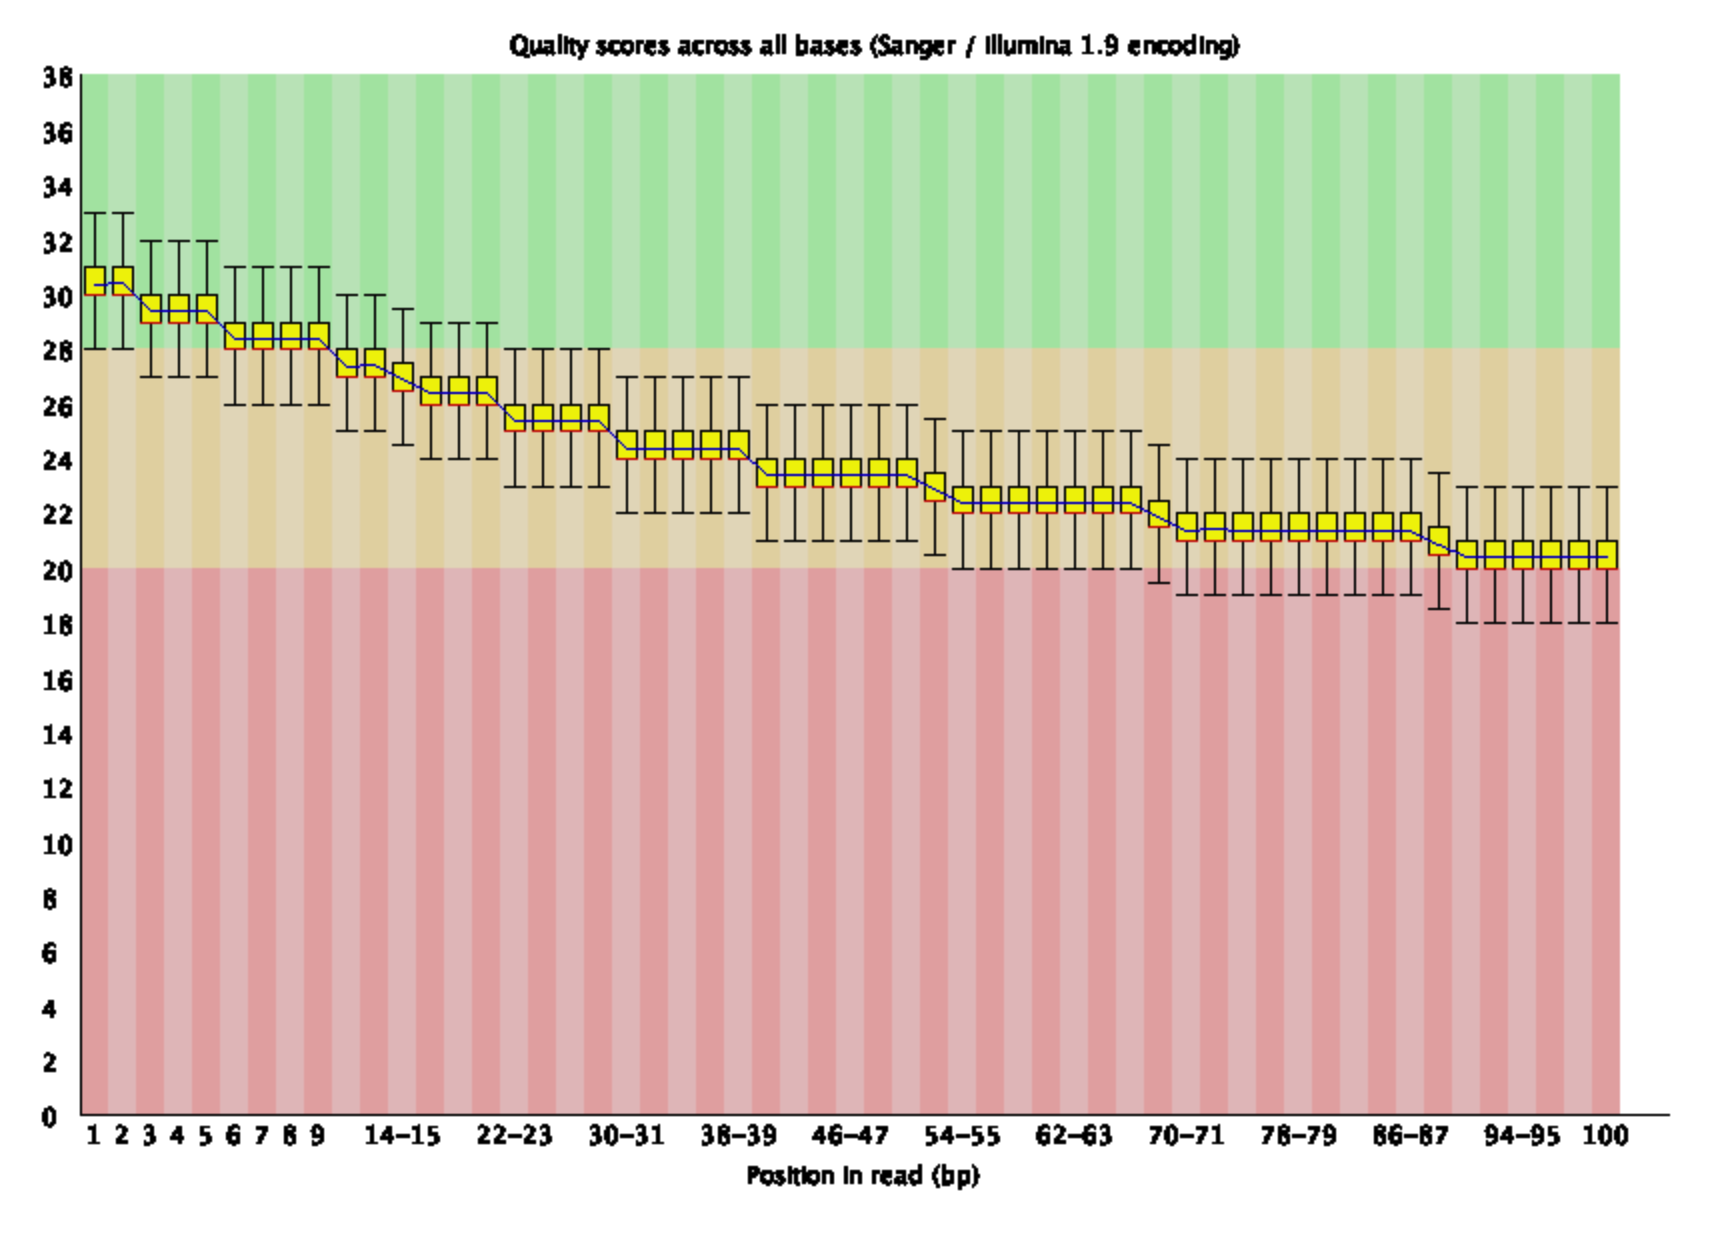

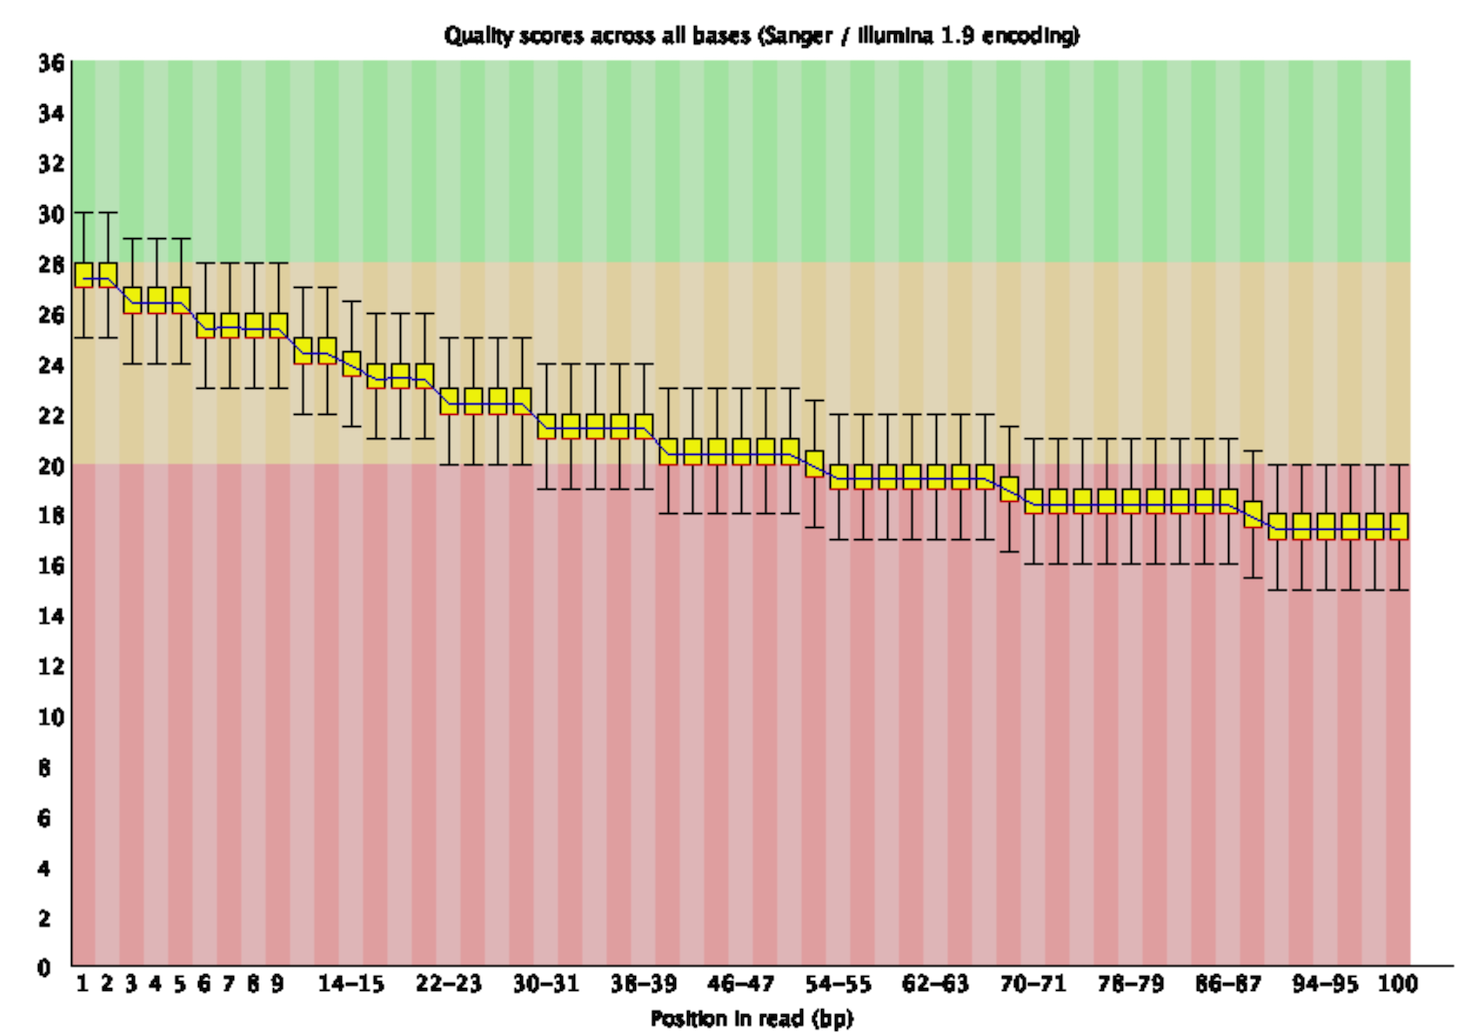

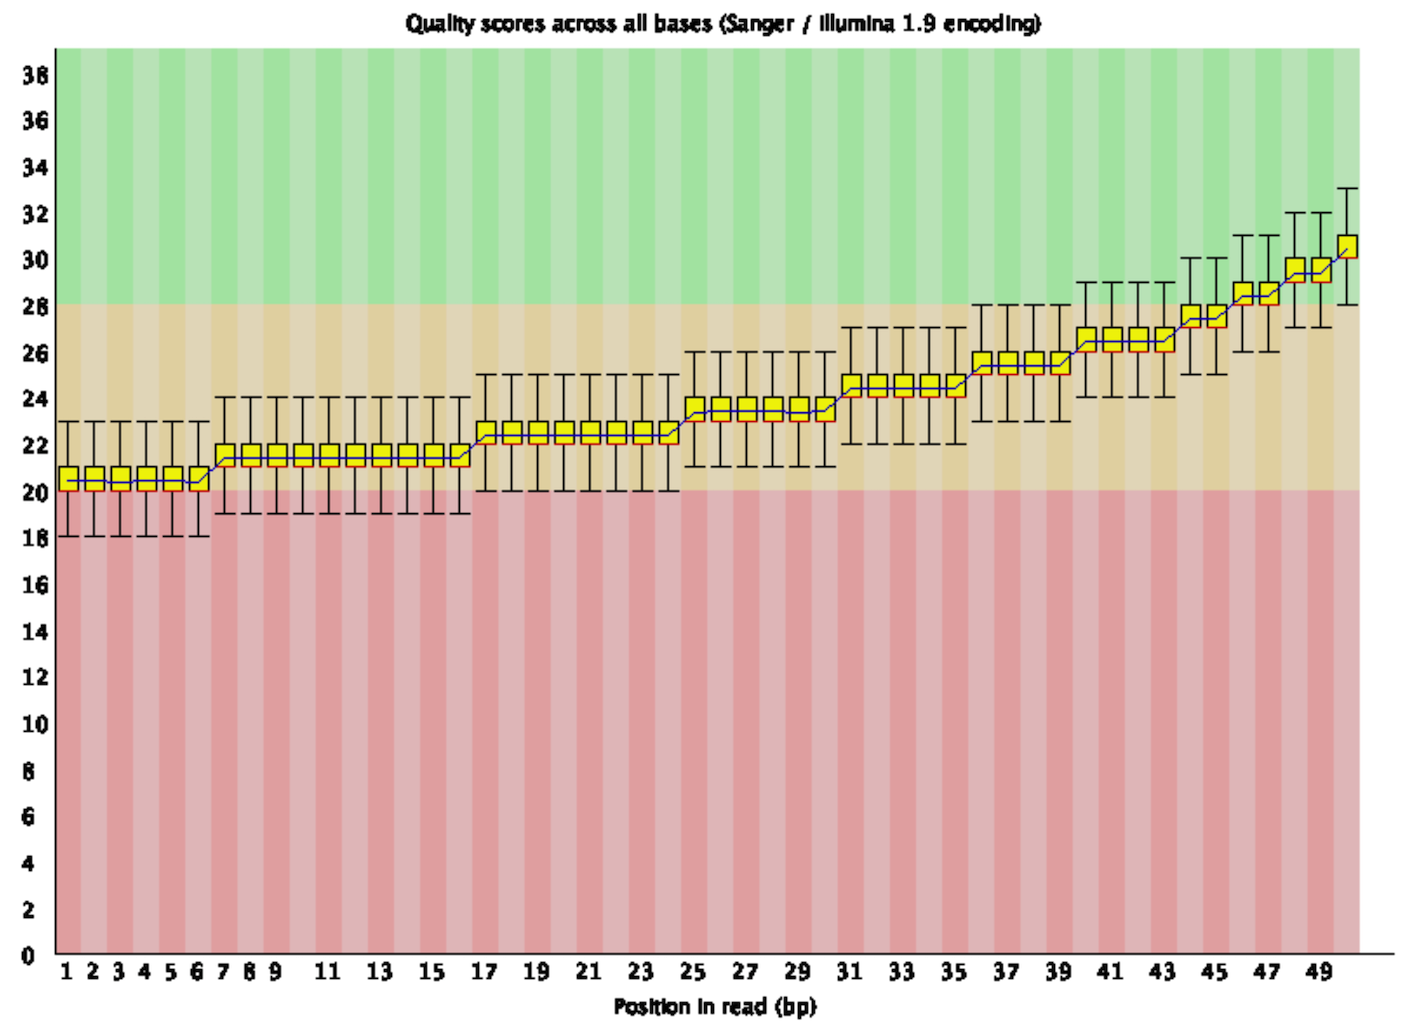

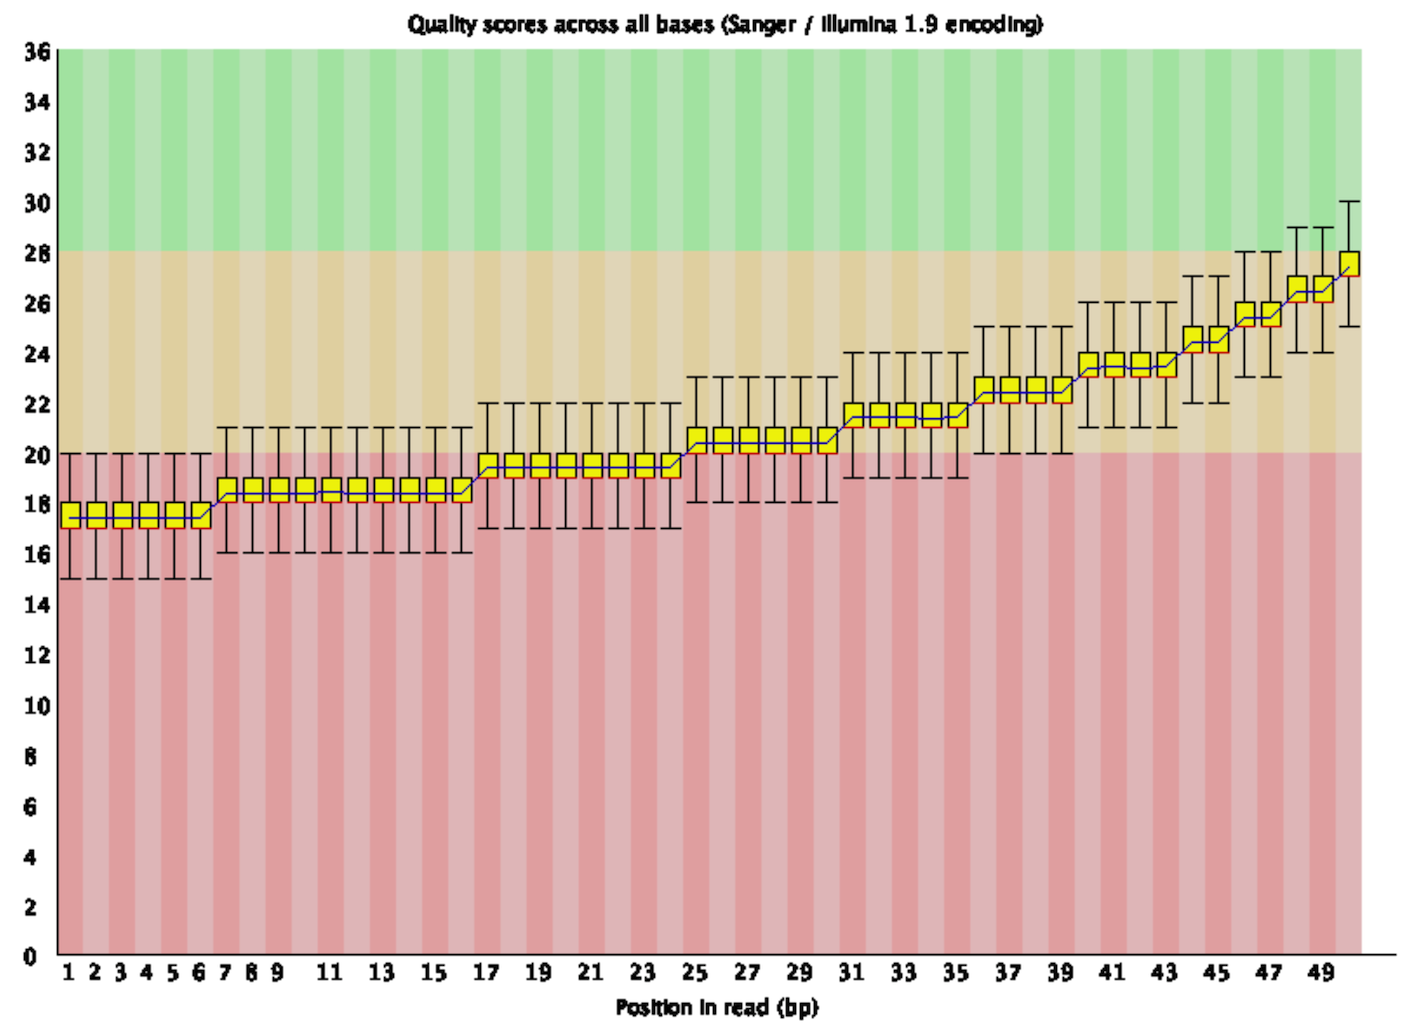

In [14]:
#Frag180.1 Quality Score Plot
Frag180_1 = ("/Users/cmdb/Desktop/asm/frag180.1_fastqc/frag180.1.png")
Fg1 = Image.open(Frag180_1)
#Frag180.2 Quality Score Plot
Frag180_2 = ("/Users/cmdb/Desktop/asm/frag180.2_fastqc/frag180.2.png")
Fg2 = Image.open(Frag180_2)
#Jump2k.1 Quality Score Plot
Jump2k_1 = ("/Users/cmdb/Desktop/asm/jump2k.1_fastqc/jump2k.1.png")
Jk1 = Image.open(Jump2k_1)
#Jump2k.2 Quality Score Plot
Jump2k_2 = ("/Users/cmdb/Desktop/asm/jump2k.2_fastqc/jump2k.2.png")
Jk2 = Image.open(Jump2k_2)
display(Fg1, Fg2, Jk1, Jk2)

Question 2: Kmer Analysis
1.) 1091 Kmers occur exactly 50 times
        (command:jellyfish count -m 21 -C -s 1000000 /Users/cmdb/Desktop/asm/*.fq
                 jellyfish histo mer_counts.jf > frag180.2.reads.histo
                 cat reads.histo)
            
2.) Top 10 most frequently occuring kmers after sorting: (82-105)
    105     GCCCACTAATTAGTGGGCGCC
    104     CGCCCACTAATTAGTGGGCGC
    104     CCCACTAATTAGTGGGCGCCG
    101     ACGGCGCCCACTAATTAGTGG
    98      CAGGCCAGCTTATAAGCTGGC
    98      AACAGGCCAGCTTATAAGCTG
    97      ACAGGCCAGCTTATAAGCTGG
    95      AGGCCAGCTTATAAGCTGGCC
    83      AGCATCGCCCACATGTGGGCG
    82      GCATCGCCCACATGTGGGCGA
        (Command: jellyfish dump mer_counts.jf | paste - - | cut -c 2- | sort -n -r
        
3.) Genome size based on the kmer size:
     min “Genome Haploid Length” - 233,725 bp
     
4.) The GenomeScope genome size estimate closely compares to the reference genome by about 80bp 


Question 3: De novo Assembly
1.) The number of contigs produced is 4
        (Command: grep -c '>' contigs.fasta)

2.) The total lengths of the contigs are:
    105831  
    47861
    41352 
    39423  
        (Command: less -S contigs.fasta.fai)
    
3.) The size of the largest contig is 105831 
4.) What is the contig N50 size? Node 2 - 47861

Question 4: Whole Genome Alignment
1.) Average identity of the assembly compared to the reference in aligned base pairs: 99.70%
        (Command: dnadiff /Users/cmdb/Desktop/asm/ref.fa /Users/cmdb/Desktop/asm/asm/contigs.fasta)

2.) The length of the longest alignment is 105831
        (Command: nucmer /Users/cmdb/Desktop/asm/ref.fa /Users/cmdb/Desktop/asm/asm/contigs.fasta)

3.) There is one insertion/deletion in the query sequence
        (Command: dnadiff /Users/cmdb/Desktop/asm/ref.fa /Users/cmdb/Desktop/asm/asm/contigs.fasta)

Question 5: Decoding the Insertion
1.) The position of the insertion: 13,354 and 14,565
        (Command: show-coords out.delta)
      
2.) The insertion is 712 bp
      (Command: show-coords out.delta)
      
3.) Sequence of the insertion:
TAACGATTTACATCGGGAAAGCTTAATGCAATTCACGCAGATATTCAGCTTAGAAGGTAC
GCAGCGGTGACGGGGTGCGGTCCATAATCTATGAAGCTATGAATTCGTACCTCAAGTAAT
GTTTTCTTCGCTGCAGTTCAGAAGTGATAAAGGTATCCCGCTTAGCCTGGCATACTTTGT
GCGTTCGTACCGCCCAGCATTAATGACTTGTGTAGGCAAGTAATGAACGACTCTTCTACG
CCGCGCCTAACCTCCGCACATAATGGCAGCATGTGGTAGTTACATACGCACAGAAGTGGT
TCGGTTTTAACTATAGTCAGATATGAATAAGCTGCGTGTGTCGTTGTGTCGGCGTGTCGT
ACTTACCTCCTGACATAGGTGAATTTCAGCCTACTGTAAGTTTGGAGTCGCGCTCTTTTC
TTATTATATTCTTTGGTATGTGTGTGATGGGTTCGGGCGTGTATTGATGTCTCTAAGGCT
CATGTTAGTGTTTATTTGGTCAGTTATGACGGTGTTCCTGTCGTACGTGTTGGCTTAGCG
GACTTGTAGACGGGATCAAGGTTGTCTGACCCTCCGGTCGACCGTGGGTCGGCCGTCCCG
GCCAGAATACAAGCCGCTTAGACTTTCGAAAGAGGGTAAGTTACTACGCGCGAACGTTAT
ACCTCGTTTCAGTATGCACTCCCTTAAGTCACTCAGAAAAGACTAAGGGGCT
(Command: samtools faidx /Users/cmdb/Desktop/asm/asm/contigs.fasta  NODE_3_length_41352_cov_20.588756:13,854-14,565 > insertion_seq.txt)

4.) Congratulations to the 2020 CMDB @ JHU class!  Keep on looking for little green aliens...
    (Command: python ported_decoder.py -d --rev_comp --input insertion_seq.txt)